# Bank Marketing

Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.



In [1]:
import pandas as pd
import numpy as np

#read the csv file

data_read= pd.read_csv('bank-additional-full.csv',delimiter=';')

In [2]:
#Converting the csv file to dataframe

df= pd.DataFrame(data_read)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Since we have a target column(y)with yes/no values and other columns are not numerical nature so we will find out the data type of the columns

In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We will here see the summary of the dataframe to know more about the columns so we can know how to treat them

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Here we will separate our target and feature variable

In [5]:
X= df.drop('y',axis=1)
y=df['y']

Now we will check if the dataset is balanced or not if the dataset is not balanced then we have to balance it.

counts.min() returns the minimum count, which represents the least frequent data point in the dataset.

counts.max() returns the maximum count, which represents the most frequent data point in the dataset.

(counts.min() / counts.max()) calculates the ratio of the minimum count to the maximum count. This ratio represents how imbalanced the dataset is, with a value closer to 1 indicating a more balanced dataset, and a value further from 1 indicating a more imbalanced dataset.

In [6]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
count= y.value_counts()

balanced= (count.min()/count.max()) >= 0.8
print(f"is the dataset balanced - {balanced} ")

is the dataset balanced - False 


# In order to apply SMOTE I need to encode the categorical values

In [8]:
feature_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

for col in feature_col:
    X[col]= encoder.fit_transform(X[col])

# Since I dont have encoded y column which is my target column I'll replace the values of yes/no by 1 and 0 respectively

In [10]:
y=y.replace({'no':0,'yes':1})

# I applied Standard Scalar in order to contain the values in between 0 and 1

In [11]:
from sklearn.preprocessing import StandardScaler

standard= StandardScaler()

X_scaled= standard.fit_transform(X)

# I splitted my dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Now I'll apply SMOTE in order to balance the training data

In [13]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X_train,y_train= smote.fit_resample(X_scaled,y)

In [14]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

model= lr.fit(X_train,y_train)

In [15]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8560330177227482
Precision: 0.4337730870712401
Recall: 0.879144385026738
F1-score: 0.5809187279151943


In [18]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
cm


array([[6230, 1073],
       [ 113,  822]])

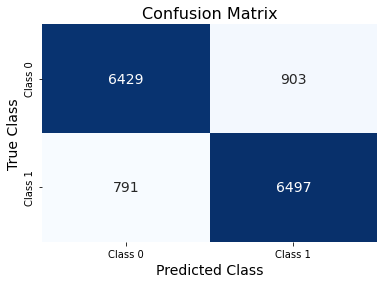

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Class 0', 'Class 1']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# SVM model

In [19]:
from sklearn import svm

clf= svm.SVC()

model_svm= clf.fit(X_train,y_train)

In [20]:
y_pred_svm=model_svm.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

In [22]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8641660597232338
Precision: 0.4526261585993821
Recall: 0.9401069518716577
F1-score: 0.6110531803962461


In [23]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred_svm)
cm

array([[6240, 1063],
       [  56,  879]])

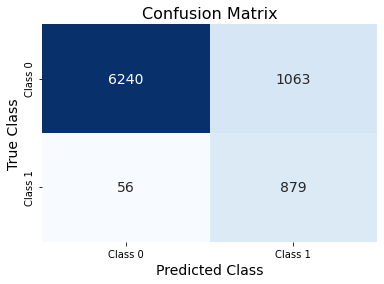

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Class 0', 'Class 1']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()